# Calculate the average 2D image of a run

## Example that uses the Bernina Environment

In [1]:
%matplotlib notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from escape.parse import swissfel
import h5py
from jungfrau_utils import apply_gain_pede, apply_geometry
h5py.enable_ipython_completer()
import time

In [2]:
run = '0000_test01'
data = swissfel.parseScanEco_v01('/sf/bernina/data/p17743/res/scan_info/run%s.json'%run,
                                 createEscArrays=True, 
                                 memlimit_mD_MB=50)

Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch2-DATA-AMP in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch1-TIME-AXIS in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch3-DATA-AMP in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch1-DATA-AMP in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch3-TIME-AXIS in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch4-TIME-AXIS in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch2-TIME-AXIS in cycle 0
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch4-DATA-AMP in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 1
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch3-TIME-AXIS in cycle 1
Found empty dataset in SAROP21-CVME-PBPS2:Lnk9Ch1-DATA-

In [3]:
jf7 = data['JF07T32V01']

with h5py.File('/sf/bernina/config/jungfrau/gainMaps/JF07T32V01/gains.h5','r') as f:
    gains = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/JF_pedestals/pedestal_20190115_1551.JF07T32V01.res.h5','r') as f:
    pede = f['gains'].value
    noise = f['gainsRMS'].value
    mask = f['pixel_mask'].value

In [4]:
num_shots = jf7.data.shape[jf7.eventDim]
print(num_shots)
icorr = apply_gain_pede(jf7.data[0].compute(),G=gains, P=pede, pixel_mask=mask)
icorr_geom = apply_geometry(icorr,'JF07T32V01')

for i_shot in range(10):#num_shots):
    t1 = time.time()
    icorr = apply_gain_pede(jf7.data[i_shot].compute(),G=gains, P=pede, pixel_mask=mask)
    icorr_geom += apply_geometry(icorr,'JF07T32V01')
    print('%.1f Hz'%(1.0/(time.time() - t1)))
    
#mask_geom = ~apply_geometry(~(mask>0),'JF07T32V01')
#icorr_geom_mask = icorr_geom
#icorr_geom_mask[mask_geom] = np.nan


1100
4.8 Hz
4.9 Hz
4.7 Hz
4.9 Hz
4.8 Hz
4.8 Hz
4.9 Hz
4.9 Hz
4.7 Hz
4.9 Hz


<IPython.core.display.Javascript object>


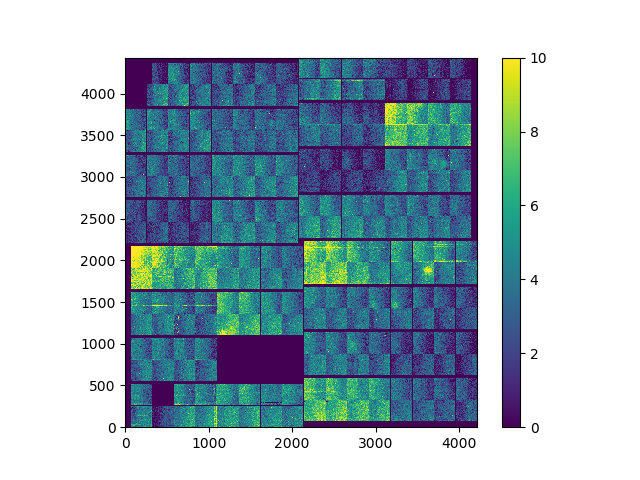

In [5]:
plt.figure()
plt.imshow(icorr_geom,clim=[0,10],origin='lower')
plt.colorbar()
plt.show()